In [1]:
# Importando bibliotecas

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [28]:
prec = pd.read_excel('C:/Users/andreaguiar/Desktop/Pessoas/aldrey/mestrado/data/temperature/Pc2018b_v2.xls', sheet_name='precipitacao', encoding='latin1', header=2)
temp = pd.read_excel('C:/Users/andreaguiar/Desktop/Pessoas/aldrey/mestrado/data/temperature/vl_temperatura.xlsx', sheet_name='vl_temperatura', encoding='latin1', header=0)

In [29]:
prec = prec.drop('Dia', axis=1)
prec.columns = temp.drop(['NOV', 'DEZ'], axis=1).columns 

In [30]:
prec

,JAN,FEV,MAR,ABR,MAI,JUN,JUL,AGO,SET,OUT
0,0.0,0.1,0.6,1.8,0.1,0.0,0.1,6.1,0.0,2.1
1,0.1,0.0,13.5,0.1,0.1,0.0,0.0,0.4,0.1,0.0
2,9.6,0.0,0.5,11.1,0.0,1.2,0.0,14.1,1.6,1.5
3,0.1,0.0,9.3,0.1,0.2,0.2,0.0,0.1,3.0,0.2
4,0.0,1.4,3.5,0.0,0.0,0.3,0.0,0.5,1.5,0.4
5,1.5,0.7,10.7,0.0,0.0,0.3,0.1,9.7,0.2,4.6
6,12.7,0.0,4.4,0.0,1.4,3.5,0.1,0.1,0.1,2.8
7,24.9,0.0,1.7,0.0,0.0,0.6,0.0,0.1,0.0,4.7
8,0.9,0.0,0.0,0.0,0.0,0.0,0.0,1.4,0.0,9.4
9,14.0,5.7,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.9


In [31]:
temp = temp.drop(['NOV', 'DEZ'], axis=1)

In [32]:
df_temp = pd.DataFrame(temp.unstack()).reset_index()
df_temp.columns = ['MONTHS','DAY','TEMPERATURE']

df_prec = pd.DataFrame(prec.unstack()).reset_index()
df_prec.columns = ['MONTHS','DAY','PRECIPITACAO']

In [33]:
df = pd.concat([df_temp, df_prec[['PRECIPITACAO']]], axis=1)

In [34]:
df.DAY = df.DAY + 1

In [35]:
df.head()

,MONTHS,DAY,TEMPERATURE,PRECIPITACAO
0,JAN,1,23.979167,0.0
1,JAN,2,23.908333,0.1
2,JAN,3,21.400000,9.6
3,JAN,4,21.541667,0.1
4,JAN,5,21.404167,0.0


In [36]:
month_map = {'JAN':1,
'FEV':2,
'MAR':3,
'ABR':4, 
'MAI':5, 
'JUN':6, 
'JUL':7, 
'AGO':8, 
'SET':9,
'OUT':10}

In [37]:
df['NUM_MONTHS'] = df.MONTHS.map(month_map)

In [38]:
df.MONTHS.unique()

array(['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET',
       'OUT'], dtype=object)

In [39]:
# verao
avg_verao = df.iloc[0:82].TEMPERATURE.mean()

In [40]:
# outono
avg_outono = df.iloc[82:176].TEMPERATURE.mean()

In [41]:
# inverno
avg_inverno = df.iloc[176:270].TEMPERATURE.mean()

In [42]:
# primavera
avg_primavera = df.iloc[270::].TEMPERATURE.mean()

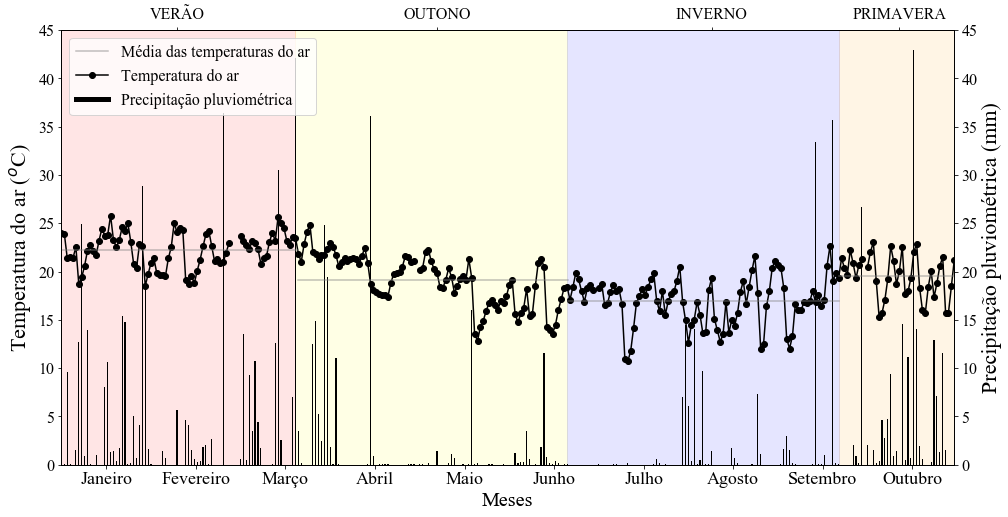

In [95]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16
fig, ax = plt.subplots(figsize=(16, 8))

ax2 = ax.twinx()

df.TEMPERATURE.plot(ax=ax, marker='o', grid='off', color='k')
plt.bar(df.index, df.PRECIPITACAO, width=.4, color='k')


ax.fill_between(np.arange(0,82), y1=0, y2=45,alpha=0.1, color='red')
ax.fill_between(np.arange(81,176), y1=0, y2=45,alpha=0.1, color='yellow')
ax.fill_between(np.arange(175,270), y1=0, y2=45,alpha=0.1, color='blue')
ax.fill_between(np.arange(269,310), y1=0, y2=45,alpha=0.1, color='orange')

plt.axhline(y=avg_verao, xmin=0, xmax=82/310, color='gray', alpha=0.5, label='_nolegend_')
plt.axhline(y=avg_outono, xmin=82/310, xmax=176/310, color='gray', alpha=0.5, label='_nolegend_')
plt.axhline(y=avg_primavera, xmin=270/310, xmax=310/310, color='gray', alpha=0.5, label='_nolegend_')
plt.axhline(y=avg_inverno, xmin=176/310, xmax=270/310, color='gray', alpha=0.5, label='Média das Temperaturas')

ax3 = ax.twiny()

ax.set_ylim(bottom=0, top=45)
ax2.set_ylim(bottom=0, top=45)

ax.set_ylabel('Temperatura do ar ($^o$C)', fontsize=22)
ax.set_xlabel('Meses', fontsize=20 )
ax2.set_ylabel('Precipitação pluviométrica (mm)', fontsize=22)

ax.set_xticks([15.5, 46.5, 77.5, 108.5, 139.5, 170.5, 201.5, 232.5, 263.5, 294.5])
ax.set_xticklabels(['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro'], fontsize=18)

#plt.xticks( (15.5, 46.5, 77.5, 108.5, 139.5, 170.5, 201.5, 232.5, 263.5, 294.5), ['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro'] , fontsize=12)
# {'fontsize': rcParams['axes.titlesize'],
#  'fontweight': rcParams['axes.titleweight'],
#  'verticalalignment': 'baseline',
#  'horizontalalignment': loc}
#ax = plt.gca()

ax3.set_xlim(ax.get_xlim())
ax3.set_xticks([40, 130, 225, 290])
ax3.set_xticklabels( ['VERÃO','OUTONO','INVERNO','PRIMAVERA'] , )


plt.subplots_adjust(hspace=.4, wspace= 0.1)

ax2.plot(np.nan, '-o', color='k', label = 'Temperatura')  # Make an agent in ax
ax2.plot(np.nan, color='k', linewidth=5, label = 'Precipitação')  # Make an agent in ax
ax2.legend(['Média das temperaturas do ar','Temperatura do ar','Precipitação pluviométrica'], loc=2 , fontsize=16)
plt.savefig('./estacoes.png', dpi=300)
plt.show()